In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
house_df= pd.read_csv("files/housing.csv")
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


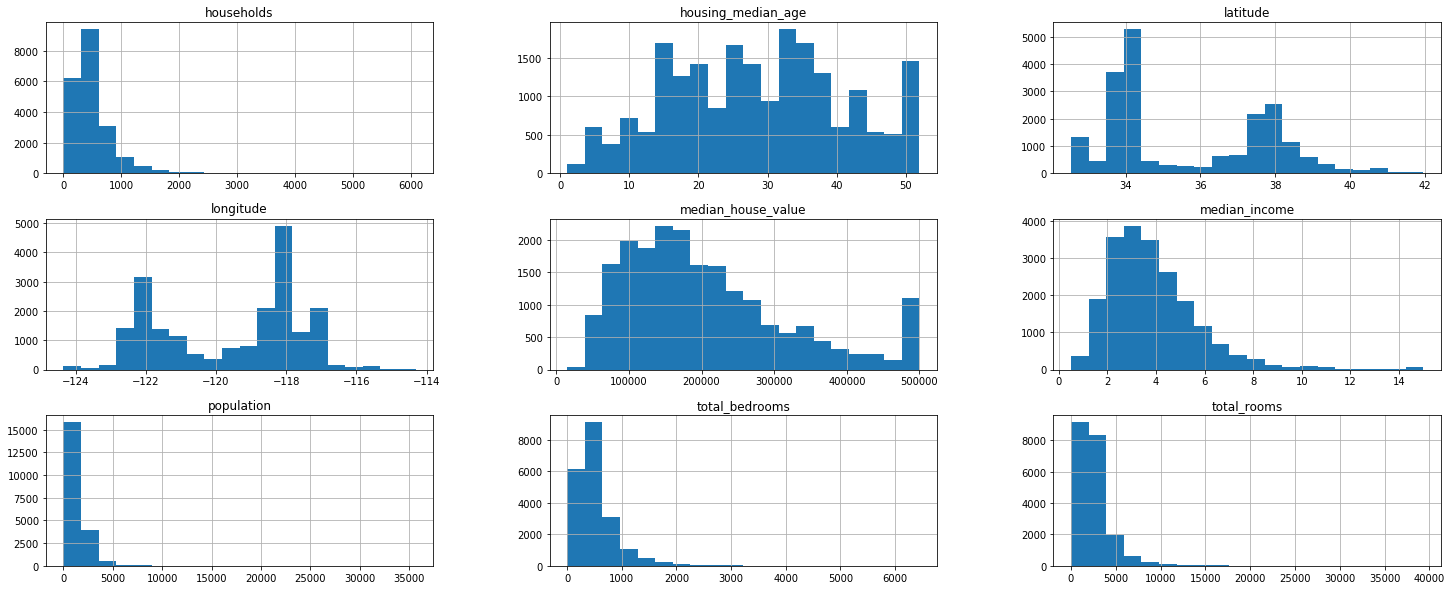

In [8]:
house_df.hist(bins=20, figsize=(25,10))
plt.show()

In [9]:
house_df["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [10]:
house_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(house_df, test_size = 0.2, random_state =42)

## Data Visualization

In [12]:
housing_train = house_df.copy()

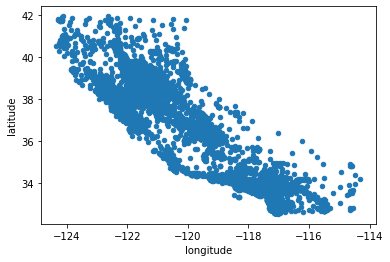

In [13]:
house_df.plot(kind = "scatter", x = "longitude", y ="latitude")

In [14]:
## lyts try to visualize the places with high desnity of data points

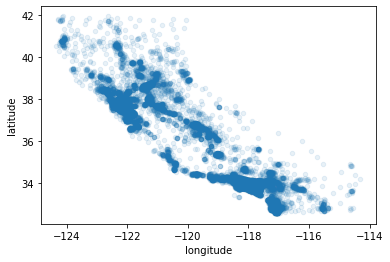

In [15]:
house_df.plot(kind = "scatter", x ="longitude", y ="latitude",alpha = 0.1)

## i will now plot and see the housing prices of each city. 
 > 1 the radius of each circle represent the district population
 > 2. the color represent the price

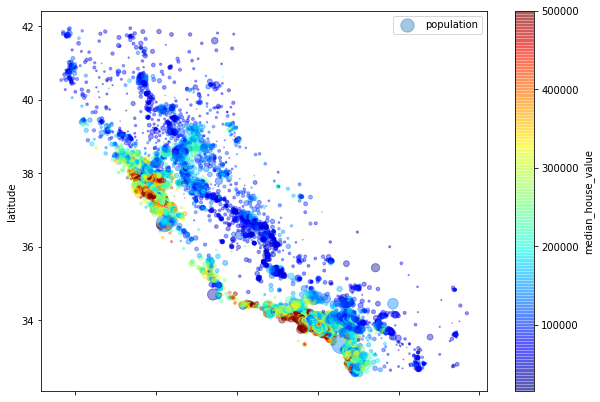

In [16]:
house_df.plot(kind ="scatter", x ="longitude",y="latitude",alpha = 0.4, s = house_df["population"] /100, label = "population", figsize =(10,7),c ="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True),
plt.legend()

## let's check for the correlation in our dataset

In [17]:
corr_matrix = house_df.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [19]:
house_df["rooms_per_household"]  = house_df["total_rooms"]/house_df["households"]
house_df["bedrooms_per_room"] = house_df["total_bedrooms"]/house_df["total_rooms"]
house_df["population_per_household"] = house_df["population"]/house_df["households"]

In [20]:
corr_matrix = house_df.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [22]:
house_df = housing_train.drop("median_house_value",axis= 1)
housing_label = housing_train["median_house_value"].copy()

### filling the missing features in the `total_bedrooms` using the median values available 

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy="median")

### since the simpleImputer only occurs in the numerical values now i need to drop the `Ocean_proximity colum`

In [25]:
housing_num = house_df.drop("ocean_proximity",axis=1)

In [26]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [27]:
X= imputer.transform(housing_num)

## Handling Text and categorical attributes

In [28]:
housing_cate = house_df[["ocean_proximity"]]
housing_cate.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


## using oneHotEncoder to tranform the strings into numbers

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cate)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [33]:

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(house_df.values)

In [34]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    house_df.columns.get_loc(c) for c in col_names] # get the column indices

In [35]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(house_df.columns)+["rooms_per_household", "population_per_household"],
    index=house_df.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,6.98413,2.55556
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,6.23814,2.10984
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,8.28814,2.80226
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,5.81735,2.54795
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,6.28185,2.18147


## transformation pipelines

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy ="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [38]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

## Column Transformer

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [41]:
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),
                                  ("Cat",OneHotEncoder(),cat_attribs)])

In [42]:
housing_prepared = full_pipeline.fit_transform(house_df)

## selecting the model for the machine learning to train

## Linear Regression 

In [43]:
from sklearn .linear_model import LinearRegression

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
some_data = house_df.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Price Prediction:",lin_reg.predict(some_data_prepared))

Price Prediction: [406122.44317288 431667.18043819 377259.09665099 319150.08569981
 252750.08280698]


In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse= mean_squared_error(housing_label,housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [48]:
lin_mse

4662995013.991171

## DecisionTree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [92]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label,housing_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

0.0

## Fine Tunning the model

In [52]:
from sklearn.model_selection import cross_val_score

In [93]:
scores = cross_val_score(tree_reg,housing_prepared,housing_label, scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores= np.sqrt(-scores)

In [94]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [117611.15532193  72276.94274756  83022.59206027  74950.40603468
  89977.64291153  77719.86923246  68918.46177171  99331.91357965
  94816.63464193  75710.1026665 ]
Mean: 85433.57209682211
Standard Deviation: 14327.782907435563


In [96]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [84183.66301514 61191.52853899 86743.60959739 62286.73445075
 80537.25795828 68918.58661112 52504.86407192 90904.22793667
 77675.08903006 53940.95369716]
Mean: 71888.65149074615
Standard Deviation: 13247.671855830762


## RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Cross validation for RandomForest`

In [99]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18355.53186615592

In [102]:
%%time
from sklearn.model_selection import cross_val_score
rest_scroes = cross_val_score(forest_reg,housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scroes)
display_scores(forest_rmse_scores)

Scores: [98442.2790451  47399.15777634 65256.56646586 56714.80046538
 60740.9631706  60304.88709502 47299.64927609 79672.66937079
 74410.59985887 49455.49740283]
Mean: 63969.706992687214
Standard Deviation: 15444.206254771281
Wall time: 2min 12s


## Support Vector Machien

In [103]:
from sklearn.svm import SVR

## cross validations for SVM

In [104]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18355.53186615592

### Now that i have used three different kinds of Algorithms i will try to do the hyperparameter  tunning

1 . Using the `GridSearchCV`
2 . Using the `RandomizedSearchCv`

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS

In [117]:
param_grid =[
    {
        "n_estimators":[3,10,30], "max_features":[2,4,6,8]
    },
#     {"boostrap": [False], "n_estimators":[3,10], "max_features":[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [118]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [119]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)